# Time series analysis of the clincal Transport request.
We are given a dataset representing an information about all the hospital equipment requests made.

Moreover, it also provides information about the status of those requests at differnt time intervals. Lets explore the dataset and find out key insights from it.

## Description of the variables in the dataset

1. **Transport Name** : Name of the equipments bring transported or requested to transport
2. **Requesting_Dept** : Name of the department requesting the equipments.
3. **Requested_DTTM** : Date and time of the equipment being requested. 
4. **Assigned_DTTM** : Date and time of the request being assigned. 
5. **Acknowledged_DTTM** : Date and time of the request being acknowledged.
6. **InProgress_DTTM** : Date and time of the request being in progress.
7. **Completion_DTTM** : Date and time of the request being completed.
8. **Cancellation_DTTM** : Date and time of the request being cancelled.
9. **Postponed_DTTM** : Date and time of the request being postponed.

# Lets start by importing all the necessary libraries that will need for data exploration, analysis and visualization of the data.

### Import the libraries

In [1]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import time, timedelta 
import datetime, warnings, scipy 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,precision_score

from sklearn import tree

### Read the data

In [2]:
df = pd.read_excel('/content/dataset.xlsx')
df.head()

,Transport_Name,Requesting_Dept,Requested_DTTM,Assigned_DTTM,Acknowledged_DTTM,InProgress_DTTM,Completion_DTTM,Cancellation_DTTM,Postponed_DTTM
0,Blood gas,2 BIR,2019-01-01 00:02:32,NaT,NaT,2019-01-01 00:02:32,2019-01-01 00:02:36,NaT,NaT
1,Blood gas,2 BIR,2019-01-01 00:14:40,2019-01-01 00:17:08,2019-01-01 00:17:11,2019-01-01 00:22:27,2019-01-01 00:23:24,NaT,NaT
2,Blood gas,2 BIR,2019-01-01 00:28:07,2019-01-01 00:28:07,2019-01-01 00:28:25,2019-01-01 00:28:33,2019-01-01 00:40:08,NaT,NaT
3,Other,1 EME,2019-01-01 03:57:12,2019-01-01 03:57:12,2019-01-01 03:57:26,2019-01-01 03:59:58,2019-01-01 04:01:44,NaT,NaT
4,Blood gas,2 BIR,2019-01-01 04:55:02,2019-01-01 06:19:30,2019-01-01 06:19:46,2019-01-01 06:20:58,2019-01-01 06:33:57,NaT,NaT


# Explanatory Data Analysis
Before creating the model, I will perform some explanatory data visualization to get some insights on the data. 

### Check total rows and columns in the dataset

In [3]:
df.shape

(21163, 9)

### Check the column names

In [4]:
df.columns

Index(['Transport_Name', 'Requesting_Dept', 'Requested_DTTM', 'Assigned_DTTM',
       'Acknowledged_DTTM', 'InProgress_DTTM', 'Completion_DTTM',
       'Cancellation_DTTM', 'Postponed_DTTM'],
      dtype='object')

# Check the dataypes of the columns 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21163 entries, 0 to 21162
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Transport_Name     21163 non-null  object        
 1   Requesting_Dept    21163 non-null  object        
 2   Requested_DTTM     21163 non-null  datetime64[ns]
 3   Assigned_DTTM      20526 non-null  datetime64[ns]
 4   Acknowledged_DTTM  20393 non-null  datetime64[ns]
 5   InProgress_DTTM    19759 non-null  datetime64[ns]
 6   Completion_DTTM    19697 non-null  datetime64[ns]
 7   Cancellation_DTTM  1466 non-null   datetime64[ns]
 8   Postponed_DTTM     3365 non-null   datetime64[ns]
dtypes: datetime64[ns](7), object(2)
memory usage: 1.5+ MB


# Check for missing data

In [6]:
df.isna().sum()

Transport_Name           0
Requesting_Dept          0
Requested_DTTM           0
Assigned_DTTM          637
Acknowledged_DTTM      770
InProgress_DTTM       1404
Completion_DTTM       1466
Cancellation_DTTM    19697
Postponed_DTTM       17798
dtype: int64

### Here we can see that our data is having missing values. But because these statuses are connected to each other, the data is not really missing. For example, if there is any request which is completed, the cancellation column will be empty. 

### Likewise, if the request is completed as soon as its assigned, then the in_progress column will have no value. Therefore, when we perform feature engineering, these values will be taken care of. Lets continue to explore until then.

# Check the statistical distrubution of the columns

In [7]:
df.describe()

,Transport_Name,Requesting_Dept,Requested_DTTM,Assigned_DTTM,Acknowledged_DTTM,InProgress_DTTM,Completion_DTTM,Cancellation_DTTM,Postponed_DTTM
count,21163,21163,21163,20526,20393,19759,19697,1466,3365
unique,10,26,21157,20424,20314,19721,19638,1466,3363
top,Linen,2 BIR,2019-12-04 20:04:32,2019-12-27 09:05:37,2019-12-27 09:06:02,2019-10-09 13:09:44,2019-12-17 08:19:58,2019-01-01 15:27:02,2019-12-27 11:41:07
freq,6129,4412,2,4,4,3,3,1,3
first,NaN,NaN,2019-01-01 00:02:32,2019-01-01 00:17:08,2019-01-01 00:17:11,2019-01-01 00:02:32,2019-01-01 00:02:36,2019-01-01 15:27:02,2019-01-01 08:41:30
last,NaN,NaN,2019-12-31 23:37:59,2019-12-31 23:39:28,2019-12-31 23:39:29,2019-12-31 23:46:46,2019-12-31 23:49:59,2019-12-31 15:41:31,2019-12-31 21:40:54


# Now that we have seen the statistical distribution of the dataset, lets see how uniqure our records are. 

# Check the uniqueness of the features

In [8]:
df['Transport_Name'].value_counts()

Linen                            6129
Other                            3703
Blood gas                        3280
Bed Collection                   2474
Specimen Collection              2128
Equipment Pickup (Non OR/MDR)    1539
MDR Collection                   1062
Blood product                     709
02 Tank/02 Tank Collection        124
Visitor Pickup                     15
Name: Transport_Name, dtype: int64

In [9]:
df['Requesting_Dept'].value_counts()

2 BIR    4412
1 EME    2189
7 SUR    1828
1 INT    1648
6 GI     1119
4BD C     989
4 MED     961
4MG C     924
T7 NE     861
T6 CT     816
T4 CH     813
T7 RE     583
3 OBS     569
T4 SU     507
T9 AC     359
PES S     350
T5 CO     346
5MG T     345
T8 RE     312
2 ALC     307
T10 A     194
3 SPE     193
T4 HE     163
T8 CO     148
5MG M     135
KIDNE      92
Name: Requesting_Dept, dtype: int64

# Feature engineering

In order to make our data visualization easy, lets seperate our date and time columns

# Requested Time column

In [10]:
df['Requested_Time'] = pd.to_datetime(df["Requested_DTTM"])
df['Requested_Time_hour'] = df['Requested_Time'].dt.hour
df['Requested_Time_minute'] = df['Requested_Time'].dt.minute
df['Requested_Time_second'] = df['Requested_Time'].dt.second
df['Requested_Time'] = df['Requested_Time_hour']*60*60 + df['Requested_Time_minute']*60 + df['Requested_Time_second']
df = df.drop(['Requested_Time_hour', 'Requested_Time_minute','Requested_Time_second'], axis = 1)

# Postponed_DTTM column

In [11]:
df['Postponed_DTTM'] = df['Postponed_DTTM'].fillna(0)
df['Postponed_Time'] = pd.to_datetime(df["Postponed_DTTM"], errors='coerce')
df['Postponed_Time_hour'] = df['Postponed_Time'].dt.hour
df['Postponed_Time_minute'] = df['Postponed_Time'].dt.minute
df['Postponed_Time_second'] = df['Postponed_Time'].dt.second
df['Postponed_Time'] = df['Postponed_Time_hour']*60*60 + df['Postponed_Time_minute']*60 + df['Postponed_Time_second']
df['Postponed_Time'] = df['Postponed_Time'].fillna(0)
df = df.drop(['Postponed_Time_hour', 'Postponed_Time_minute','Postponed_Time_second'], axis = 1)

# Assigned DTTM column

In [12]:
df['Assigned_DTTM'] = df['Assigned_DTTM'].fillna(0)
df['Assigned_Time'] = pd.to_datetime(df["Assigned_DTTM"], errors='coerce')
df['Assigned_Time_hour'] = df['Assigned_Time'].dt.hour
df['Assigned_Time_minute'] = df['Assigned_Time'].dt.minute
df['Assigned_Time_second'] = df['Assigned_Time'].dt.second
df['Assigned_Time'] = df['Assigned_Time_hour']*60*60 + df['Assigned_Time_minute']*60 + df['Assigned_Time_second']
df['Assigned_Time'] = df['Assigned_Time'].fillna(0)
df = df.drop(['Assigned_Time_hour', 'Assigned_Time_minute','Assigned_Time_second'], axis = 1)

# Acknowledged DTTM column

In [13]:
df['Acknowledged_DTTM'] = df['Acknowledged_DTTM'].fillna(0)
df['Acknowledged_Time'] = pd.to_datetime(df["Acknowledged_DTTM"], errors='coerce')
df['Acknowledged_Time_hour'] = df['Acknowledged_Time'].dt.hour
df['Acknowledged_Time_minute'] = df['Acknowledged_Time'].dt.minute
df['Acknowledged_Time_second'] = df['Acknowledged_Time'].dt.second
df['Acknowledged_Time'] = df['Acknowledged_Time_hour']*60*60 + df['Acknowledged_Time_minute']*60 + df['Acknowledged_Time_second']
df['Acknowledged_Time'] = df['Acknowledged_Time'].fillna(0)
df = df.drop(['Acknowledged_Time_hour', 'Acknowledged_Time_minute','Acknowledged_Time_second'], axis = 1)

# In progress DTTM

In [14]:
df['InProgress_DTTM'] = df['InProgress_DTTM'].fillna(0)
df['InProgress_Time'] = pd.to_datetime(df["InProgress_DTTM"], errors='coerce')
df['InProgress_Time_hour'] = df['InProgress_Time'].dt.hour
df['InProgress_Time_minute'] = df['InProgress_Time'].dt.minute
df['InProgress_Time_second'] = df['InProgress_Time'].dt.second
df['InProgress_Time'] = df['InProgress_Time_hour']*60*60 + df['InProgress_Time_minute']*60 + df['InProgress_Time_second']
df['InProgress_Time'] = df['InProgress_Time'].fillna(0)
df = df.drop(['InProgress_Time_hour', 'InProgress_Time_minute','InProgress_Time_second'], axis = 1)

# Completion_DTTM column

In [15]:
df['Completion_DTTM'] = df['Completion_DTTM'].fillna(0)
df['Completion_Time'] = pd.to_datetime(df["Completion_DTTM"], errors='coerce')
df['Completion_Time_hour'] = df['Completion_Time'].dt.hour
df['Completion_Time_minute'] = df['Completion_Time'].dt.minute
df['Completion_Time_second'] = df['Completion_Time'].dt.second
df['Completion_Time'] = df['Completion_Time_hour']*60*60 + df['Completion_Time_minute']*60 + df['Completion_Time_second']
df['Completion_Time'] = df['Completion_Time'].fillna(0)
df = df.drop(['Completion_Time_hour', 'Completion_Time_minute','Completion_Time_second'], axis = 1)

# Cancellation_DTTM

In [16]:
df['Cancellation_DTTM'] = df['Cancellation_DTTM'].fillna(0)
df['Cancellation_Time'] = pd.to_datetime(df["Cancellation_DTTM"], errors='coerce')
df['Cancellation_Time_hour'] = df['Cancellation_Time'].dt.hour
df['Cancellation_Time_minute'] = df['Cancellation_Time'].dt.minute
df['Cancellation_Time_second'] = df['Cancellation_Time'].dt.second
df['Cancellation_Time'] = df['Cancellation_Time_hour']*60*60 + df['Cancellation_Time_minute']*60 + df['Cancellation_Time_second']
df['Cancellation_Time'] = df['Cancellation_Time'].fillna(0)
df = df.drop(['Cancellation_Time_hour', 'Cancellation_Time_minute','Cancellation_Time_second'], axis = 1)

# Lets drop our old columns as we have engineered new columns for our data visualization 

In [17]:
df1 = df.drop(['Requested_DTTM', 'Postponed_DTTM','Assigned_DTTM', 'Acknowledged_DTTM','InProgress_DTTM','Completion_DTTM','Cancellation_DTTM'], axis = 1)

#### After performing feature engineering and filling our missing values in the data, we can now start finding patterns and ask questions to our data. Looking at the different time stamps of our equipent orders, is it possible to compare those columns and find out which were the euipments orderd the most, or how many cancellations happened ? 

We can start asking these questions one by one after we explore the top five rows.

# Check top 5 rows

In [18]:
df.head()

,Transport_Name,Requesting_Dept,Requested_DTTM,Assigned_DTTM,Acknowledged_DTTM,InProgress_DTTM,Completion_DTTM,Cancellation_DTTM,Postponed_DTTM,Requested_Time,Postponed_Time,Assigned_Time,Acknowledged_Time,InProgress_Time,Completion_Time,Cancellation_Time
0,Blood gas,2 BIR,2019-01-01 00:02:32,0,0,2019-01-01 00:02:32,2019-01-01 00:02:36,0,0,152,0.0,0.0,0.0,152.0,156.0,0.0
1,Blood gas,2 BIR,2019-01-01 00:14:40,2019-01-01 00:17:08,2019-01-01 00:17:11,2019-01-01 00:22:27,2019-01-01 00:23:24,0,0,880,0.0,1028.0,1031.0,1347.0,1404.0,0.0
2,Blood gas,2 BIR,2019-01-01 00:28:07,2019-01-01 00:28:07,2019-01-01 00:28:25,2019-01-01 00:28:33,2019-01-01 00:40:08,0,0,1687,0.0,1687.0,1705.0,1713.0,2408.0,0.0
3,Other,1 EME,2019-01-01 03:57:12,2019-01-01 03:57:12,2019-01-01 03:57:26,2019-01-01 03:59:58,2019-01-01 04:01:44,0,0,14232,0.0,14232.0,14246.0,14398.0,14504.0,0.0
4,Blood gas,2 BIR,2019-01-01 04:55:02,2019-01-01 06:19:30,2019-01-01 06:19:46,2019-01-01 06:20:58,2019-01-01 06:33:57,0,0,17702,0.0,22770.0,22786.0,22858.0,23637.0,0.0


In [19]:
#Making sure that the null values are filled.
df.isna().sum()

Transport_Name       0
Requesting_Dept      0
Requested_DTTM       0
Assigned_DTTM        0
Acknowledged_DTTM    0
InProgress_DTTM      0
Completion_DTTM      0
Cancellation_DTTM    0
Postponed_DTTM       0
Requested_Time       0
Postponed_Time       0
Assigned_Time        0
Acknowledged_Time    0
InProgress_Time      0
Completion_Time      0
Cancellation_Time    0
dtype: int64

# Which transport item was requested the most ?

In [20]:
Transport_Name = df['Transport_Name'].value_counts().sort_values(ascending=False)[:10]
Transport_Name

Linen                            6129
Other                            3703
Blood gas                        3280
Bed Collection                   2474
Specimen Collection              2128
Equipment Pickup (Non OR/MDR)    1539
MDR Collection                   1062
Blood product                     709
02 Tank/02 Tank Collection        124
Visitor Pickup                     15
Name: Transport_Name, dtype: int64

# Lets visualize our most requested transport equipments.

[Text(0, 0.5, '\nTime in minutes')]

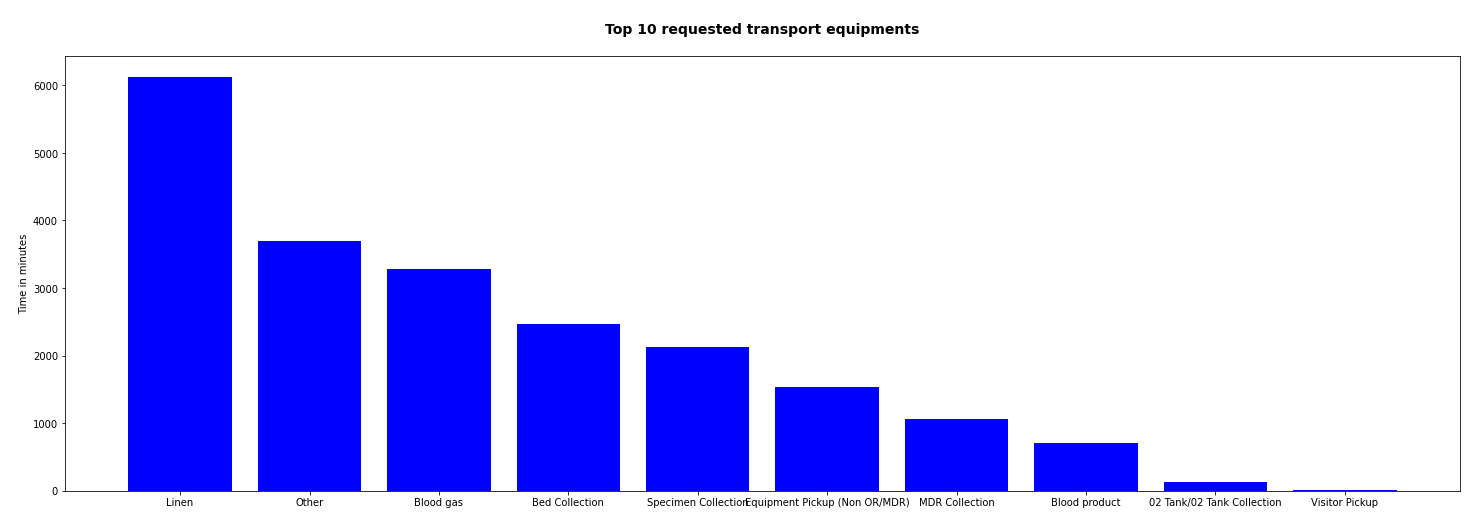

In [21]:
Transport_Name = df['Transport_Name'].value_counts().sort_values(ascending=False)[:10]

fig, ax = plt.subplots(figsize=(25,8))
ax.bar(Transport_Name.index, Transport_Name.values, color='blue')
ax.set_title('\nTop 10 requested transport equipments\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTime in minutes')

##### Out of the top 10 most requested items, Linen seems to be the most requested transport equipment with almost 6000 orders.

# Now lets find out which department made the most requests of the equipments

In [22]:
Requesting_Dept = df['Requesting_Dept'].value_counts().sort_values(ascending=False)[:10]
Requesting_Dept 

2 BIR    4412
1 EME    2189
7 SUR    1828
1 INT    1648
6 GI     1119
4BD C     989
4 MED     961
4MG C     924
T7 NE     861
T6 CT     816
Name: Requesting_Dept, dtype: int64

# Lets visualize our results to understand better

[Text(0, 0.5, '\nTime in minutes')]

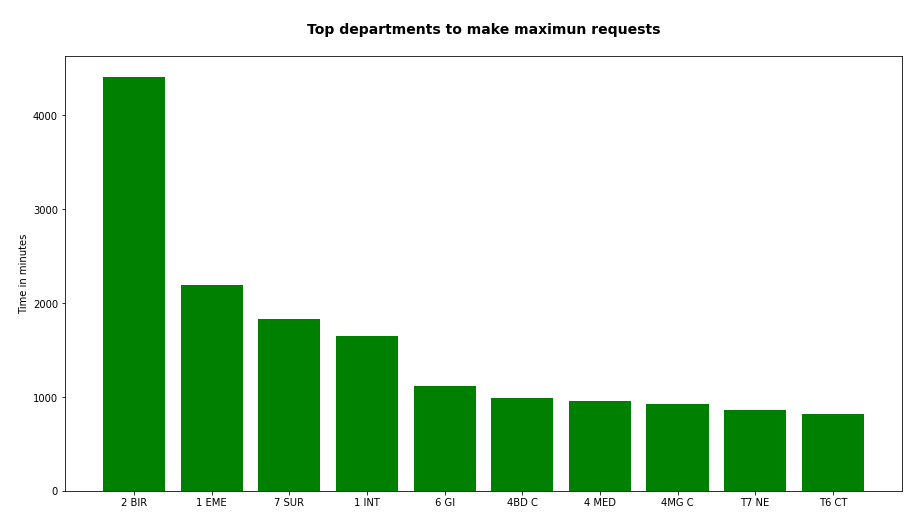

In [23]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(Requesting_Dept.index, Requesting_Dept.values, color='green')
ax.set_title('\nTop departments to make maximun requests\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTime in minutes')

### It is clear that 2 BIR made the most requests.

##### Now that we know which department made the most requests and which equipment was the most popular amongst all, I want to explore the time taken by these request to get assigned, acknowledged, postponed,completed or cancelled.  

# Which requests got cancelled the most ? 

In [24]:
Completion_Time = df.loc[df['Completion_Time'] != 0]
Completion_Time = Completion_Time['Transport_Name'].value_counts().sort_values(ascending=False)[:10]
Completion_Time

Linen                            5787
Other                            3367
Blood gas                        3202
Bed Collection                   2177
Specimen Collection              1948
Equipment Pickup (Non OR/MDR)    1440
MDR Collection                    988
Blood product                     663
02 Tank/02 Tank Collection        111
Visitor Pickup                     14
Name: Transport_Name, dtype: int64

[Text(0, 0.5, '\nTime in minutes')]

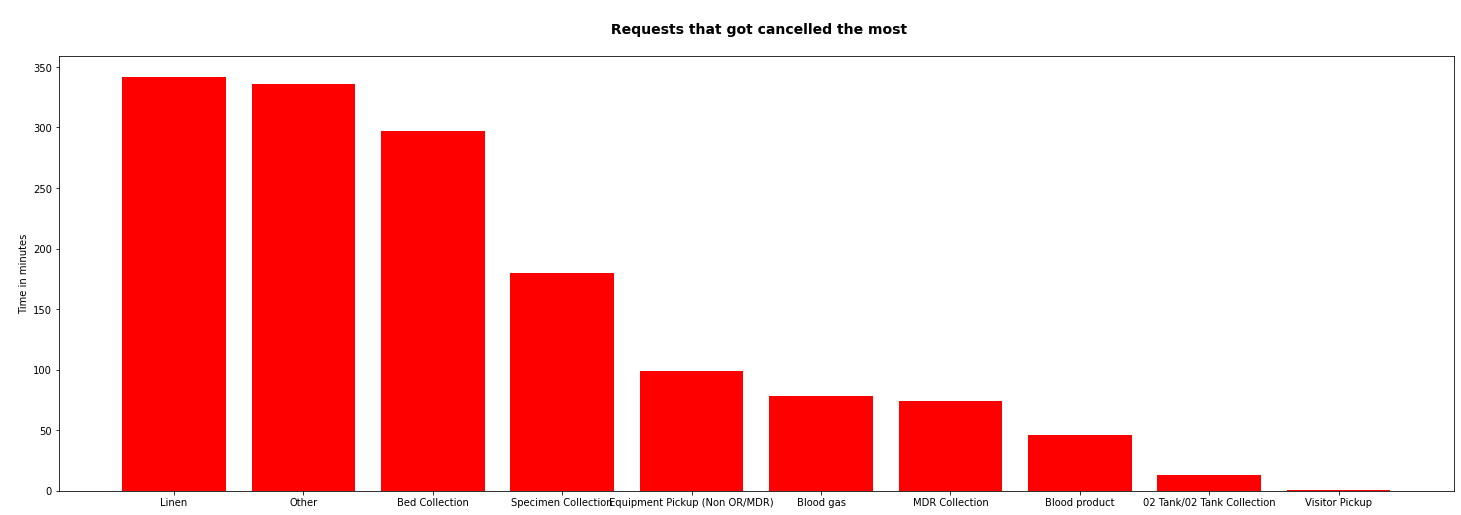

In [25]:
Cancellation_Time  = df.loc[df['Completion_Time'] == 0]
Cancellation_Time = Cancellation_Time['Transport_Name'].value_counts().sort_values(ascending=False)[:10]
# prepare plot
fig, ax = plt.subplots(figsize=(25,8))
ax.bar(Cancellation_Time.index, Cancellation_Time.values, color='red')
ax.set_title('\n Requests that got cancelled the most\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTime in minutes')

#### From this graph, we can say that Linen department's request got completed the most.

# What are the top 10 departments with highest number of cancellations ?

In [26]:
Cancellation_Time  = df.loc[df['Cancellation_Time'] != 0]
Cancellation_Time =Cancellation_Time['Requesting_Dept'].value_counts().sort_values(ascending=False)[:10]
Cancellation_Time

2 BIR    172
7 SUR    163
1 EME    149
1 INT    112
4 MED     96
6 GI      94
4BD C     92
4MG C     85
T6 CT     60
T7 NE     58
Name: Requesting_Dept, dtype: int64

[Text(0, 0.5, '\nTotal Counts')]

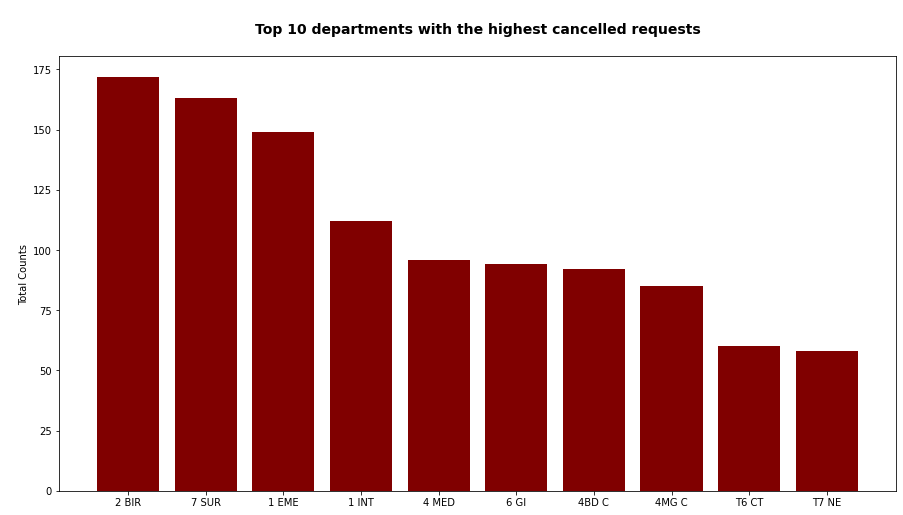

In [27]:
Cancellation_Time  = df.loc[df['Cancellation_Time'] != 0]
Cancellation_Time = Cancellation_Time['Requesting_Dept'].value_counts().sort_values(ascending=False)[:10]
# prepare plot
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(Cancellation_Time.index, Cancellation_Time.values, color='maroon')
ax.set_title('\nTop 10 departments with the highest cancelled requests\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTotal Counts')

# 2 BIR, 7 SUR, 1 EME, 1 INT, 4 MED, 6 GI, 4BD C, 4MG C, T6 CT, T7 NE were the top 10 departments which had the maximum cancellations

# Which department got the most completed requests ?

# Lets explore some more features in the dataset where we can find out how long does any request took to get acknowledged after getting assigned.

In [28]:
df['Difference_1'] = df['Acknowledged_Time'] - df['Assigned_Time']

# Which departments took the longest time to get acknowledged after they got assigned ?

In [29]:
df.groupby('Requesting_Dept')['Difference_1'].max().sort_values(ascending=False)[:10]/3600

Requesting_Dept
2 ALC    6.770278
T7 NE    6.203056
T6 CT    5.079444
4BD C    4.925556
T7 RE    4.733333
1 EME    4.645556
5MG T    4.235833
6 GI     4.073889
5MG M    3.878333
4 MED    3.822222
Name: Difference_1, dtype: float64

# 2 ALC , T7 NE, T6 CT , 4BD C , T7 RE were the top requests which took the longest time to get acknowledged after getting assigned

### Lets plot these values inorder to visualize them.

[Text(0, 0.5, '\nTime in minutes')]

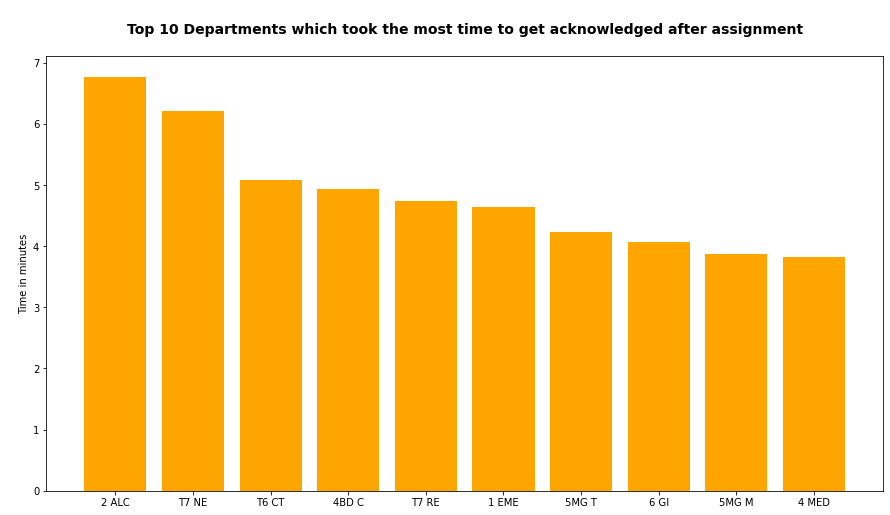

In [30]:
Completion_Time =df.groupby('Requesting_Dept')['Difference_1'].max().sort_values(ascending=False)[:10]/3600

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(Completion_Time.index, Completion_Time.values, color='orange')
ax.set_title('\nTop 10 Departments which took the most time to get acknowledged after assignment\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTime in minutes')

# Which departments' requests took the longest time to go in progress after being assgined ?

In [31]:
df['Difference_2'] =   df['InProgress_Time'] - df['Assigned_Time']

In [32]:
df.groupby('Requesting_Dept')['Difference_2'].max().sort_values(ascending=False)[:15]/3600

Requesting_Dept
2 ALC    6.771389
T7 NE    6.204167
T6 CT    5.080556
4BD C    4.926667
T7 RE    4.777778
1 EME    4.691111
5MG T    4.236944
6 GI     4.075833
5MG M    3.879444
4 MED    3.856944
1 INT    3.815833
4MG C    3.743611
7 SUR    3.440833
3 OBS    3.400556
T9 AC    3.308056
Name: Difference_2, dtype: float64

# Lets visualize this.

[Text(0, 0.5, '\nTime in minutes')]

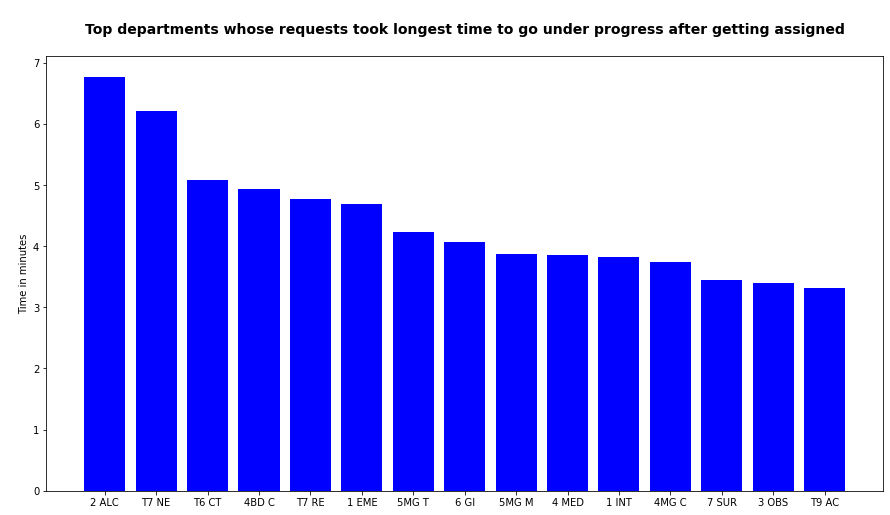

In [33]:
Completion_Time =df.groupby('Requesting_Dept')['Difference_2'].max().sort_values(ascending=False)[:15]/3600
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(Completion_Time.index, Completion_Time.values, color='blue')
ax.set_title('\nTop departments whose requests took longest time to go under progress after getting assigned\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTime in minutes')

# 2 ALC took the longest time to go under progress.

#Which departments' requests took longest time to get completed after going under progress ?

In [34]:
df['Difference_3'] =   df['Completion_Time'] - df['InProgress_Time']
Difference_3 = df.loc[(df['Difference_3'] >= 0)  & (df['Cancellation_Time'] == 0)]
Difference_3.groupby('Requesting_Dept')['Difference_3'].max().sort_values(ascending=False)[:10]/3600

Requesting_Dept
1 EME    4.655556
2 BIR    4.606111
7 SUR    3.093056
5MG M    3.037222
T5 CO    2.753333
T10 A    2.506667
1 INT    2.424444
T7 RE    2.118333
4MG C    2.074722
T7 NE    1.914722
Name: Difference_3, dtype: float64

# Visualizing it 

[Text(0, 0.5, '\nTime in minutes')]

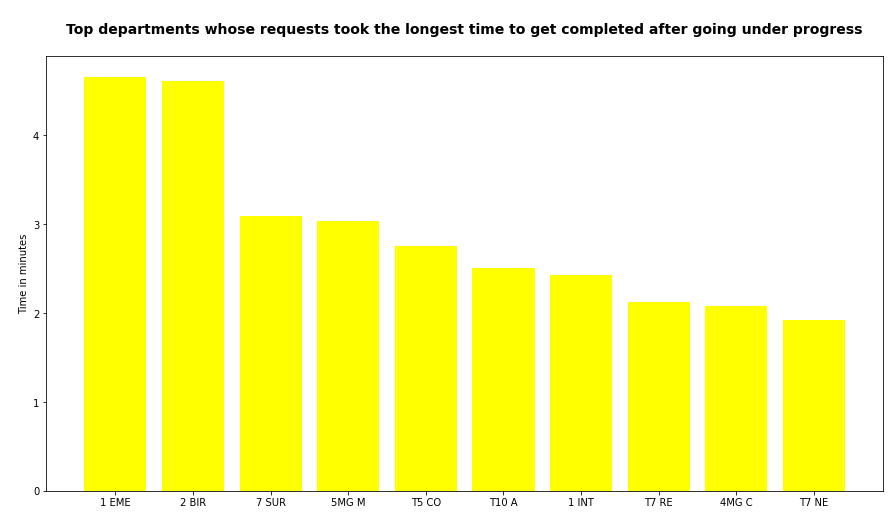

In [35]:
Completion_Time =Difference_3.groupby('Requesting_Dept')['Difference_3'].max().sort_values(ascending=False)[:10]/3600

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(Completion_Time.index, Completion_Time.values, color='yellow')
ax.set_title('\nTop departments whose requests took the longest time to get completed after going under progress\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTime in minutes')

### 1 EME, 2 BIR took almost 5 minutes , which is the longest time as per the graph. 

# Which departments' requests took the least amount of time to get completed after going under progress ?

In [36]:
df['Difference_4'] =   df['Completion_Time'] - df['InProgress_Time']
Difference_4 = df.loc[(df['Difference_4'] >= 0)  & (df['Cancellation_Time'] == 0)]
Difference_4.groupby('Requesting_Dept')['Difference_4'].max().sort_values(ascending=True)[:10]/3600

Requesting_Dept
KIDNE    0.566944
T8 RE    0.619722
T4 HE    0.621667
T8 CO    0.760833
2 ALC    0.840833
T4 SU    0.867500
T4 CH    0.965278
T6 CT    1.009722
3 SPE    1.048611
3 OBS    1.103889
Name: Difference_4, dtype: float64

# Lets visualize it

[Text(0, 0.5, '\nTime in minutes')]

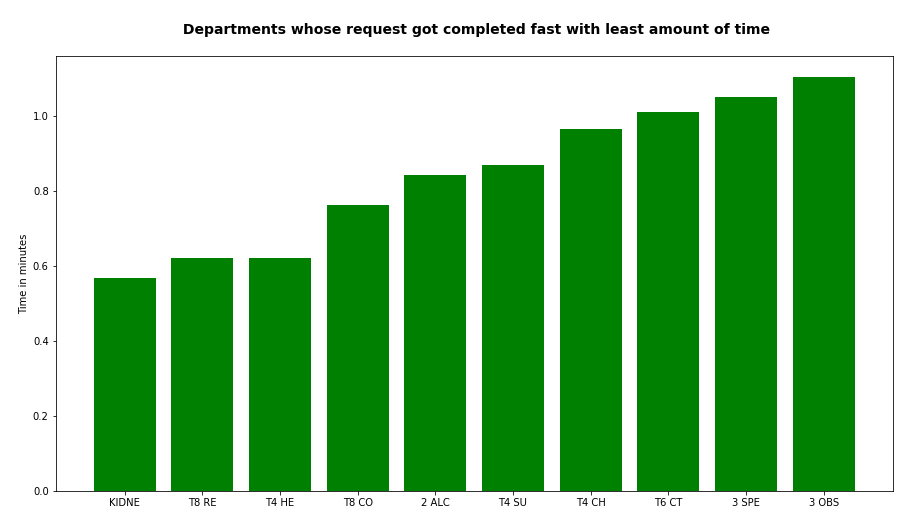

In [37]:
Completion_Time =Difference_4.groupby('Requesting_Dept')['Difference_4'].max().sort_values(ascending=True)[:10]/3600
# prepare plot
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(Completion_Time.index, Completion_Time.values, color='green')
ax.set_title('\n Departments whose request got completed fast with least amount of time\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTime in minutes')

# KIDNE, T8 RE and T4 HE department got their equipments pretty quickly as compared to others. 

# Which departments' requests took the longest time to get cancelled after being under progress?

In [38]:
df['Difference_5'] =   df['Cancellation_Time'] - df['InProgress_Time']
Difference_5 = df.loc[df['Cancellation_Time'] > 0]
Difference_5.groupby('Requesting_Dept')['Difference_5'].max().sort_values(ascending=False)[:10]/3600

Requesting_Dept
1 EME    23.975556
4BD C    23.962500
1 INT    23.957222
2 BIR    23.952500
PES S    23.896667
T6 CT    23.817500
7 SUR    23.811389
6 GI     23.793889
T7 NE    23.704722
3 OBS    23.631111
Name: Difference_5, dtype: float64

# Lets visualize

[Text(0, 0.5, '\nTime')]

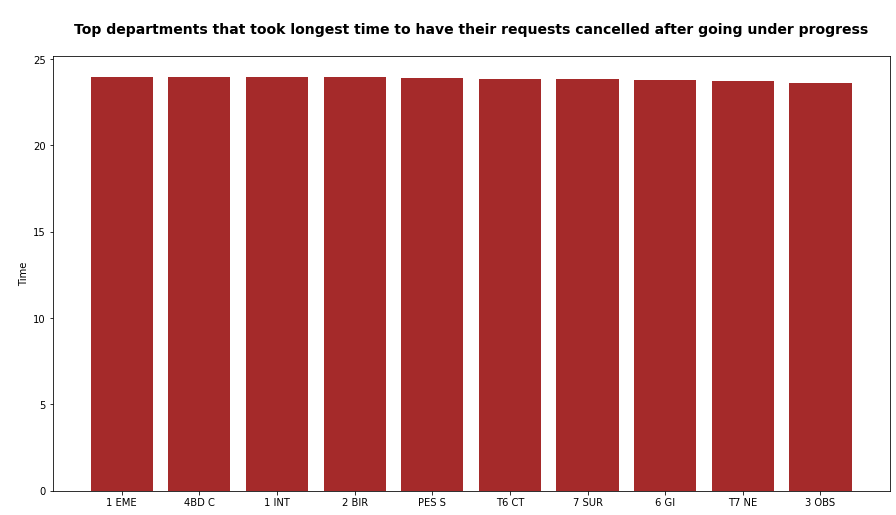

In [39]:
Completion_Time =Difference_5.groupby('Requesting_Dept')['Difference_5'].max().sort_values(ascending=False)[:10]/3600
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(Completion_Time.index, Completion_Time.values, color='brown')
ax.set_title('\nTop departments that took longest time to have their requests cancelled after going under progress\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTime')

# All the following departments took the longest time to get their request cancelled after going under progress.

1 EME    
4BD C    
1 INT    
2 BIR   
PES S   
T6 CT    
7 SUR    
6 GI    
T7 NE    
3 OBS

# Which departments' request took least amount of time to get cancelled after going under progress ?

In [40]:
df['Difference_6'] =   df['Cancellation_Time'] - df['InProgress_Time']
Difference_6 = df.loc[df['Cancellation_Time'] > 0]
Difference_6.groupby('Requesting_Dept')['Difference_6'].max().sort_values(ascending=True)[:10]/3600

Requesting_Dept
3 SPE    18.512222
T9 AC    21.198333
T7 RE    21.653056
KIDNE    21.765000
T4 HE    22.363056
2 ALC    22.466111
5MG M    22.540000
T5 CO    22.601389
T8 RE    23.021389
T8 CO    23.056667
Name: Difference_6, dtype: float64

[Text(0, 0.5, '\nTime')]

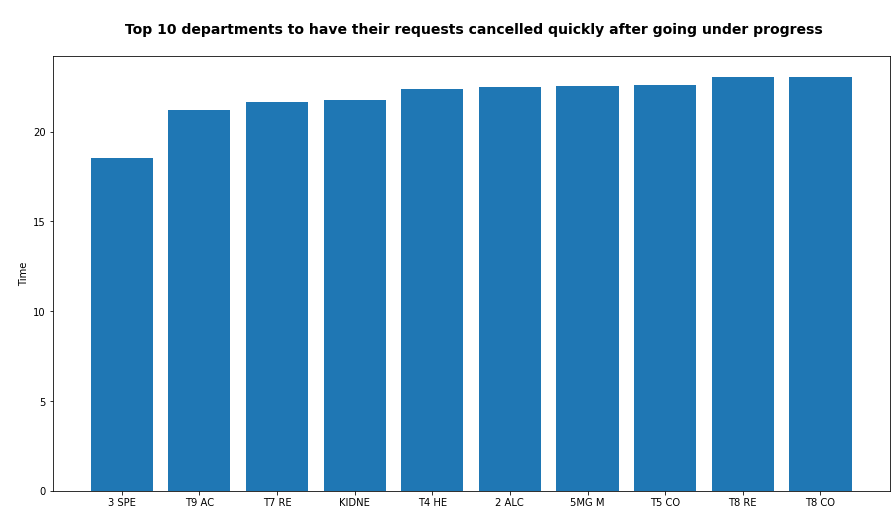

In [41]:
Completion_Time =Difference_6.groupby('Requesting_Dept')['Difference_6'].max().sort_values(ascending=True)[:10]/3600

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(Completion_Time.index, Completion_Time.values)
ax.set_title('\n Top 10 departments to have their requests cancelled quickly after going under progress\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTime')

# 3 SPE had their requests cancelled quite quickly after being postponed.

# Which departments' requests took the longest time to get cancelled after being postponed ?

In [42]:
df['Difference_7'] =   df['Completion_Time'] - df['Postponed_Time']
Difference_7 = df.loc[(df['Difference_7'] >= 0)  & (df['Cancellation_Time'] == 0)]
Difference_7.groupby('Requesting_Dept')['Difference_7'].max().sort_values(ascending=False)[:10]/3600

Requesting_Dept
1 INT    23.999167
2 BIR    23.993889
T7 NE    23.991389
4 MED    23.972778
5MG T    23.968333
6 GI     23.953611
1 EME    23.947778
7 SUR    23.944722
T5 CO    23.942500
PES S    23.932778
Name: Difference_7, dtype: float64

# Lets visualize it 

[Text(0, 0.5, '\nTime in minutes')]

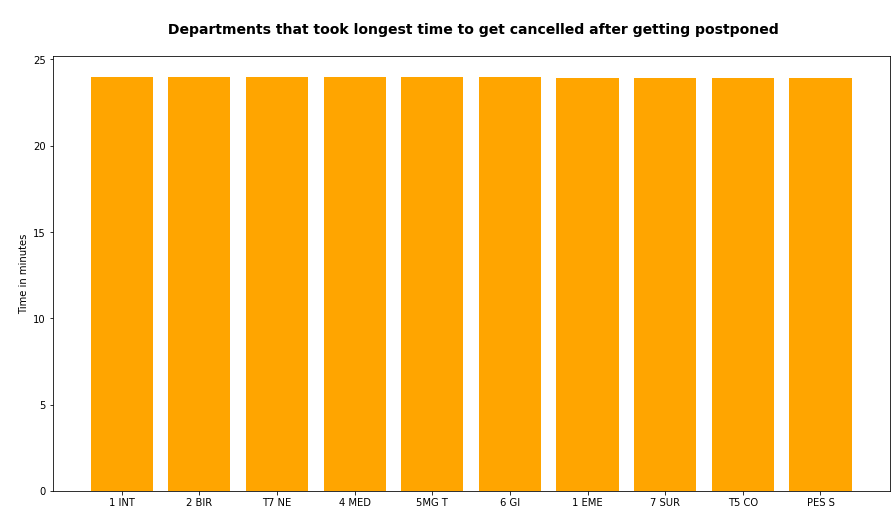

In [43]:
Completion_Time =Difference_7.groupby('Requesting_Dept')['Difference_7'].max().sort_values(ascending=False)[:10]/3600
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(Completion_Time.index, Completion_Time.values, color='orange')
ax.set_title('\n Departments that took longest time to get cancelled after getting postponed\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTime in minutes')

#### Looks like all these 10 departments had the most delayed cancellations after being postponed

1 INT  
2 BIR    
T7 NE    
4 MED   
5MG T   
6 GI     
1 EME    
7 SUR    
T5 CO    
PES S   

# Which depeartments made faster cancellations after being postponed ?

In [44]:
df['Difference_8'] =   df['Completion_Time'] - df['Postponed_Time']
Difference_8 = df.loc[(df['Difference_8'] >= 0)  & (df['Cancellation_Time'] == 0)]
Difference_8.groupby('Requesting_Dept')['Difference_8'].max().sort_values(ascending=True)[:10]/3600

Requesting_Dept
KIDNE    16.530833
T10 A    23.123889
2 ALC    23.247222
T8 RE    23.401944
3 SPE    23.631667
T9 AC    23.650833
T4 HE    23.660278
T8 CO    23.734722
4BD C    23.794444
T4 CH    23.806667
Name: Difference_8, dtype: float64

[Text(0, 0.5, '\nTime in minutes')]

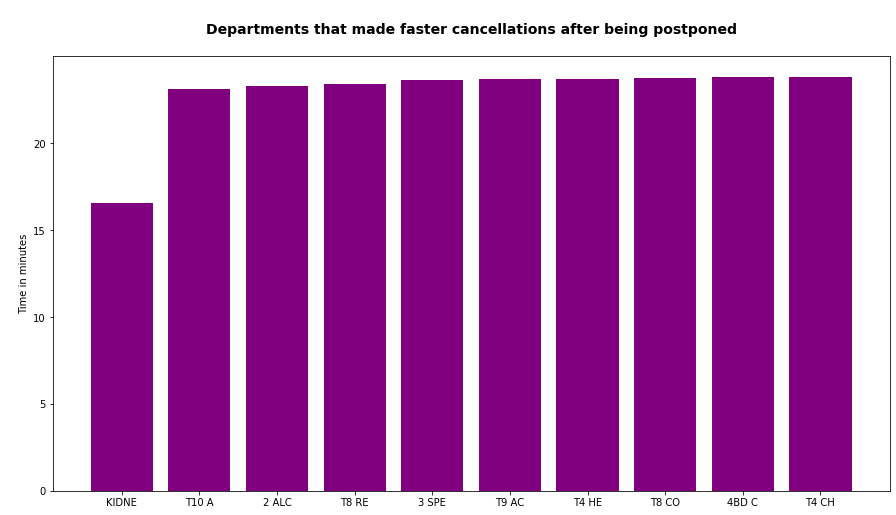

In [45]:
Completion_Time =Difference_8.groupby('Requesting_Dept')['Difference_8'].max().sort_values(ascending=True)[:10]/3600
# prepare plot
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(Completion_Time.index, Completion_Time.values, color='purple')
ax.set_title('\nDepartments that made faster cancellations after being postponed\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTime in minutes')

# KIDNE department's requests took least amount of time to make cancellations after gettting postponed

# Before we jump into modelling, we need to make sure our data is in numeric format. Lets convert the categorical columns into numerical

In [46]:
categorical_cols = ['Transport_Name', 'Requesting_Dept'] 
   
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))    


In [47]:
df.head()

,Transport_Name,Requesting_Dept,Requested_DTTM,Assigned_DTTM,Acknowledged_DTTM,InProgress_DTTM,Completion_DTTM,Cancellation_DTTM,Postponed_DTTM,Requested_Time,...,Completion_Time,Cancellation_Time,Difference_1,Difference_2,Difference_3,Difference_4,Difference_5,Difference_6,Difference_7,Difference_8
0,2,3,2019-01-01 00:02:32,0,0,2019-01-01 00:02:32,2019-01-01 00:02:36,0,0,152,...,156.0,0.0,0.0,152.0,4.0,4.0,-152.0,-152.0,156.0,156.0
1,2,3,2019-01-01 00:14:40,2019-01-01 00:17:08,2019-01-01 00:17:11,2019-01-01 00:22:27,2019-01-01 00:23:24,0,0,880,...,1404.0,0.0,3.0,319.0,57.0,57.0,-1347.0,-1347.0,1404.0,1404.0
2,2,3,2019-01-01 00:28:07,2019-01-01 00:28:07,2019-01-01 00:28:25,2019-01-01 00:28:33,2019-01-01 00:40:08,0,0,1687,...,2408.0,0.0,18.0,26.0,695.0,695.0,-1713.0,-1713.0,2408.0,2408.0
3,7,0,2019-01-01 03:57:12,2019-01-01 03:57:12,2019-01-01 03:57:26,2019-01-01 03:59:58,2019-01-01 04:01:44,0,0,14232,...,14504.0,0.0,14.0,166.0,106.0,106.0,-14398.0,-14398.0,14504.0,14504.0
4,2,3,2019-01-01 04:55:02,2019-01-01 06:19:30,2019-01-01 06:19:46,2019-01-01 06:20:58,2019-01-01 06:33:57,0,0,17702,...,23637.0,0.0,16.0,88.0,779.0,779.0,-22858.0,-22858.0,23637.0,23637.0


#### Great. Now that we have our data in numeric form, lets create the target variable. We will combine completion and cancellation time inorder to perform binary classification. Our model will then predict whether a given requested item will be cancelled or completed. 

Our main features that will work as independent variables are the variables that we got through feature engineering as well as the categorical variables we encoded. They are Transport_Name, Requesting_Dept, Requested_Time, Assigned_Time, Acknowledged_Time, InProgress_Time and Postponed_Time 



In [48]:
df['Target'] = df['Completion_Time'] + df['Cancellation_Time']
#Target represents whether the completed (0) or cancelled (1)
for dataset in df:
    df.loc[df['Completion_Time'] > 0, 'Target_final'] = 0
    df.loc[df['Cancellation_Time'] > 0, 'Target_final'] = 1

# Create the data : X and y

In [49]:
X=df[['Transport_Name','Requesting_Dept','Requested_Time', 'Postponed_Time','Assigned_Time','Acknowledged_Time', 'InProgress_Time']]
y=df['Target_final']



#Before spliting our data, lets check whether our target variable is balanced or not. In any machine learning classification problem, its very important to make sure that our dataset is balanced in order to avoid any bias in our model.

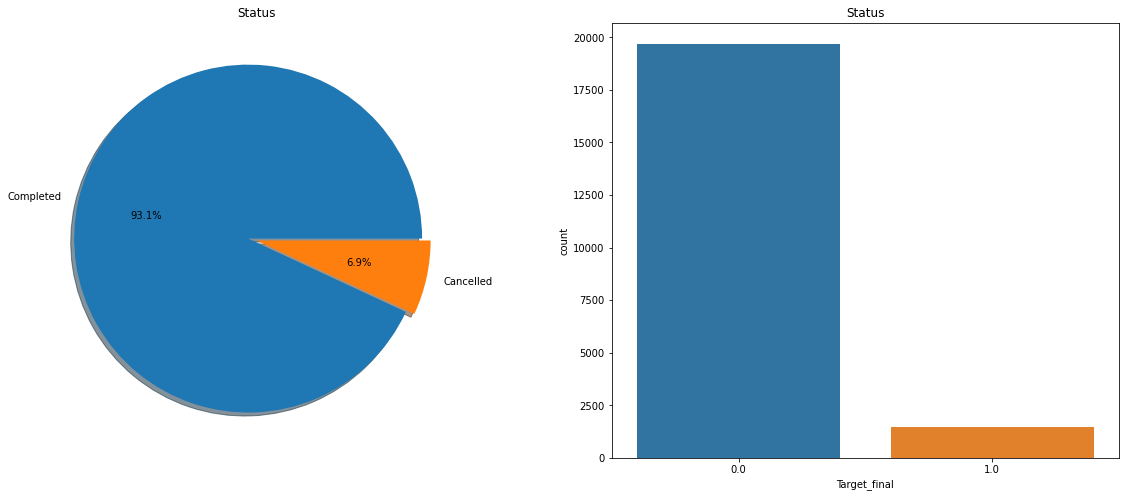

In [50]:
f,ax=plt.subplots(1,2,figsize=(20,8))
mylabels = ["Completed","Cancelled"]
df['Target_final'].value_counts().plot.pie(labels = mylabels,explode=[0.05,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Target_final',order = df['Target_final'].value_counts().index, data=df,ax=ax[1])
ax[1].set_title('Status')
plt.show()

### Over here, we can see that our target classes are highly imbalanced. Therefore, our model will overfit and favour the majority class while evaluating it on our test and unseen data. In order to overcome this problem, we should undersample the majority class so that we can create a generalised model

Before Counter({0.0: 19697, 1.0: 1466})
After Counter({0.0: 1832, 1.0: 1466})


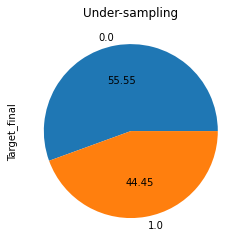

In [51]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

sampling_strategy = 0.8
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

counter = Counter(y)
print('Before',counter)

counter = Counter(y_res)
print('After',counter)

# We can see that our dataset is balanced. Now lets split our data

# Spliting the data

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=101)
print("Training Dataset", X_train.shape, y_train.shape)
print("Text Dataset",X_test.shape, y_test.shape )

Training Dataset (2638, 7) (2638,)
Text Dataset (660, 7) (660,)


# Standardisation - this is the most important step before we start training our model. We need to make sure that our data is standardised.

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model building

# Lets start with the best baseline model for training. As we proceed and use other algorithms, we shall beat the accuracy of the baseline model

In [54]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [55]:
# Make predictions
y_pred = lr.predict(X_test_scaled)

In [56]:
print(accuracy_score(y_test, y_pred))

0.9681818181818181


### We are getting 95% accuracy through our baseline model. 

# Lets see the classification report

In [57]:
print('Classificaiton Report of results')
print(classification_report(y_test,y_pred))

Classificaiton Report of results
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       379
         1.0       0.97      0.96      0.96       281

    accuracy                           0.97       660
   macro avg       0.97      0.97      0.97       660
weighted avg       0.97      0.97      0.97       660



# Lets plot confusion matrix to understand the relationship between the actual and predicted classes.

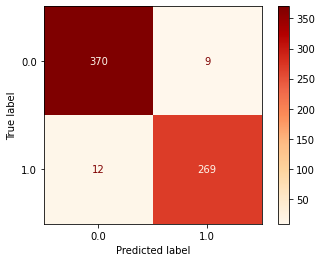

In [58]:
from sklearn.metrics import plot_confusion_matrix

displr = plot_confusion_matrix(lr, X_test_scaled, y_test ,cmap=plt.cm.OrRd , values_format='d')

#Lets try Random Forest Classifier

In [59]:
#Running Model object
rf=RandomForestClassifier()

#Train Model with data
rf.fit(X_train_scaled,y_train)

#Run Model to predict accident Severity
y_pred_rf= rf.predict(X_test_scaled)


In [60]:
# Get the accuracy score
print(accuracy_score(y_test, y_pred_rf))

0.9848484848484849


### Our accuracy with Random Forest is 98% 

# Classification report

In [61]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       379
         1.0       0.99      0.98      0.98       281

    accuracy                           0.98       660
   macro avg       0.99      0.98      0.98       660
weighted avg       0.98      0.98      0.98       660



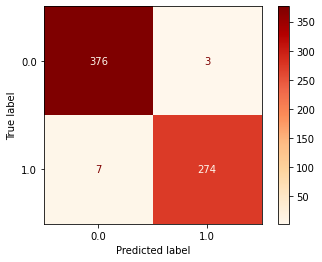

In [62]:
# Confusion matrix
con_matrix = plot_confusion_matrix(rf, X_test_scaled, y_test ,cmap=plt.cm.OrRd , values_format='d')

# Looking at our confusion matrix we can tell that our model is having 13 false negatives. 

# If we get the most important features of our dataset, we will know what features affect our model the most.

In [63]:
feature = pd.DataFrame(index = X.columns, data = rf.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
feature

,Feature Importance
InProgress_Time,0.673339
Acknowledged_Time,0.151543
Assigned_Time,0.118214
Requested_Time,0.022169
Postponed_Time,0.014873
Transport_Name,0.010525
Requesting_Dept,0.009337


# Lets plot them

No handles with labels found to put in legend.


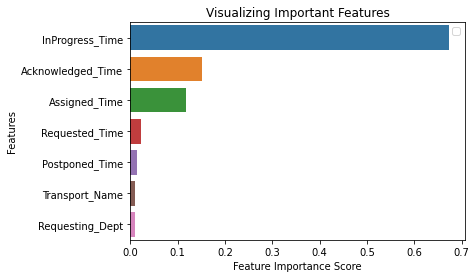

In [64]:
feature_imp = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Using feature importance

### Removing the columns with less scores and training our random forest on the best features. Next, we will repeat few steps we did earlier in the notebook and rebuild our random forest classifier.

In [65]:
X=df[['Assigned_Time','Acknowledged_Time', 'InProgress_Time']]
y=df['Target_final']



Before Counter({0.0: 19697, 1.0: 1466})
After Counter({0.0: 1832, 1.0: 1466})


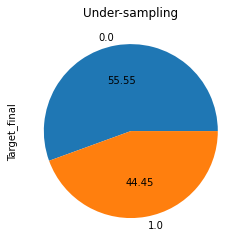

In [66]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

sampling_strategy = 0.8
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

counter = Counter(y)
print('Before',counter)

counter = Counter(y_res)
print('After',counter)

In [67]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=101)
print("Training Dataset", X_train.shape, y_train.shape)
print("Text Dataset",X_test.shape, y_test.shape )

Training Dataset (2638, 3) (2638,)
Text Dataset (660, 3) (660,)


In [68]:
#Standardise the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
#Running Model object
rf=RandomForestClassifier()

#Train Model with data
rf.fit(X_train_scaled,y_train)

#Run Model to predict accident Severity
y_pred_rf= rf.predict(X_test_scaled)


In [70]:
# Get the accuracy score
print(accuracy_score(y_test, y_pred_rf))

0.9893939393939394


# We get 98% accuracy after using the best features of our dataset

# Lets try to improve our model by using cross validation. This way, we can make sure that we are using every possible combination of our dataset and finding the best accuracy.

# Applying cross validation 

In [71]:
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
rf_xvalid_model = RandomForestClassifier(max_depth=None, random_state=101)

rf_xvalid_model_scores = cross_validate(rf_xvalid_model, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
rf_xvalid_model_scores = pd.DataFrame(rf_xvalid_model_scores, index = range(1, 11))

rf_xvalid_model_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.728314,0.079811,0.958333,0.965517,0.941176,0.953191
2,0.670967,0.046246,0.950758,0.964912,0.924370,0.944206
3,0.583407,0.044121,0.962121,0.990991,0.924370,0.956522
4,0.702122,0.059530,0.988636,1.000000,0.974790,0.987234
5,1.066926,0.117897,0.988636,1.000000,0.974790,0.987234
6,0.593080,0.045448,0.977273,0.991228,0.957627,0.974138
7,0.683593,0.040954,0.977273,1.000000,0.949153,0.973913
8,0.527758,0.046815,0.984848,1.000000,0.966102,0.982759
9,0.542339,0.041283,0.980989,0.982906,0.974576,0.978723
10,0.626456,0.084731,0.973384,0.991150,0.949153,0.969697


In [72]:
rf_xvalid_model_scores.mean()[2:]

test_accuracy     0.974225
test_precision    0.988671
test_recall       0.953611
test_f1           0.970762
dtype: float64

# After applying cross-validation , our final accuracy is 97%

# Awesome! We have successfully cleaned our data, visualized it , found the pattern in our data. We also build different classifiers and got the best accuracy of our model